In [1]:
# Core imports
import pandas as pd
import numpy as np
import morfeusz2
import re
import string
from nltk.corpus import stopwords

In [2]:
morf = morfeusz2.Morfeusz()

def LowerCase(text: str) -> str:
    """Converts letters in given text to lowercase.
    Args:
        text (str): Text to preprocess.
    Returns:
        preprocessedText (str): Lowercase text.

    """
    preprocessedText = str.lower(text)
    return  preprocessedText

def RemoveHashtags(text: str) -> str:
    """Removes hashtags from given tweet text.
    Args:
        text (str): Text to preprocess.
    Returns:
        preprocessedText (str): Text with no hashtags.

    """
    preprocessedText = re.sub('#[a-zA-Z0-9_]+', '', text )

    return preprocessedText

def RemoveMentions(text: str) -> str:
    """Removes mentions from given tweet text.
    Args:
        text (str): Text to preprocess.
    Returns:
        preprocessedText (str): Text with no mentions.

    """
    preprocessedText = re.sub('@[a-zA-Z0-9_]+', '', text )

    return preprocessedText

def RemovePunctuation(text: str) -> str:
    """Removes non text characters from given tweet text.
    Args:
        text (str): Text to preprocess.
    Returns:
        preprocessedText (str): Text with no non tex characters.

    """
    preprocessedText = text.translate(str.maketrans('', '', string.punctuation))

    return preprocessedText

def Lemmatize(text: str) -> str:
    """Lemmatizes polish text from given tweet.
    Args:
        text (str): Text to preprocess.
    Returns:
        lemmatizedText (str): Lemmatized text.

    """
    wordList = text.split()
    lemmatizedWordList = []

    for word in wordList:    
        _, _, interpretation = morf.analyse(word)[0]
        lemWord = interpretation[1]
        lemWordStripped = lemWord.split(':', 1)[0].lower()
        lemmatizedWordList.append(lemWordStripped)

    lemmatizedText = ' '.join(lemmatizedWordList)

    return lemmatizedText

def RemoveStopWords(text: str) -> str:
    """Removes stopwords.
    Args:
        text (str): Text to preprocess.
    Returns:
        preprocessedText (str): Text with no stopwords.

    """
    wordList = text.split() 
    preprecessedWordList = []

    stopWords = stopwords.words('polish')
    stopWords += ['rt']

    for word in wordList:
        if word not in stopWords:
            preprecessedWordList.append(word)

    preprocessedText = ' '.join(preprecessedWordList)

    return preprocessedText

In [16]:
# Loading tweet data

data = pd.read_csv('../data/tweets.csv')

In [17]:
data.head()

,Unnamed: 0,label,tweet
0,0,0,Dla mnie faworytem do tytułu będzie Cracovia. ...
1,1,0,@anonymized_account @anonymized_account Brawo ...
2,2,0,"@anonymized_account @anonymized_account Super,..."
3,3,0,@anonymized_account @anonymized_account Musi. ...
4,4,0,"Odrzut natychmiastowy, kwaśna mina, mam problem"


In [4]:
# Data preprocess
data.tweet = data.tweet.apply(lambda x: RemoveHashtags(x))
data.tweet = data.tweet.apply(lambda x: RemoveMentions(x))
data.tweet = data.tweet.apply(lambda x: RemovePunctuation(x))
data.tweet = data.tweet.apply(lambda x: Lemmatize(x))
data.tweet = data.tweet.apply(lambda x: RemoveStopWords(x))
data.tweet = data.tweet.apply(lambda x: LowerCase(x))

In [5]:
data.head()

,Unnamed: 0,label,tweet
0,0,0,faworyt tytuł cracovia zobaczyć typ sprawdzić
1,1,0,brawo daria kibic mieć bycie dobre zły
2,2,0,super polski premier składać kwiat grób kolabo...
3,3,0,muszy drogi mama
4,4,0,odrzut natychmiastowy kwaśny mina mieć problem


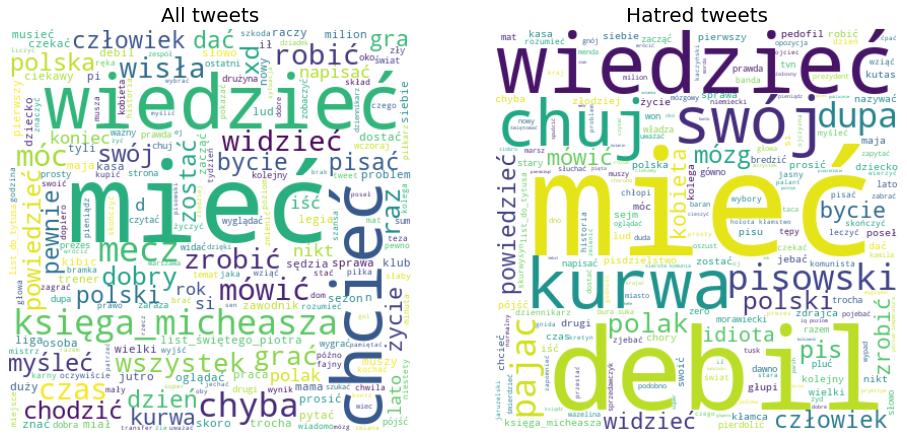

In [6]:
# Generating word cloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
plt.style.use('ggplot')

all_words = ' '.join(data.tweet.values)
hatred_words = ' '.join(data[data.label == 1].tweet.values)

plt.figure(figsize=(16, 8))

cloud1 = WordCloud(width=400, height=400, background_color='white').generate(all_words)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('All tweets', size=20)

cloud2 = WordCloud(width=400, height=400, background_color='white').generate(hatred_words)
plt.subplot(122)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Hatred tweets', size=20)
plt.show()